# Multilayer Perceptron
 
##### Sign Language Recognition on Sign Language MNIST dataset

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

##### Network architecture
##### <span style = "color : orange">Input->Hidden layer 1->Hidden layer 2->Hidden layer 3->Hidden layer 4->Hidden layer 5->Output</span>

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data preprocessing

In [3]:
# read data
data = pd.read_csv('../input/sign_mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [5]:
print('Shape Of Original Data : ', data.shape)

Shape Of Original Data :  (27455, 785)


In [6]:
# extract x and y
y = data['label'].values
x = data.drop(['label'], axis = 1).values

In [7]:
# preprocessing 
x = x/255                     # normalize x
y_encoded = np.eye(25)[y]     # one hot encode y

In [8]:
print('Shape Of x         \t: ', x.shape)
print('Shape Of y_encoded \t: ', y_encoded.shape)

Shape Of x         	:  (27455, 784)
Shape Of y_encoded 	:  (27455, 25)


In [9]:
# train-test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y_encoded, test_size = 0.33)

In [10]:
print('Shape of train_x \t: ', train_x.shape)
print('Shape of train_y \t: ', train_y.shape)
print('Shape of test_x  \t: ', test_x.shape)
print('Shape of test_y  \t: ', test_y.shape)

Shape of train_x 	:  (18394, 784)
Shape of train_y 	:  (18394, 25)
Shape of test_x  	:  (9061, 784)
Shape of test_y  	:  (9061, 25)


## Helper Functions

In [11]:
# helper function for getting a batch of data
def next_batch(batch_size, data, labels):
    
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    
    idx = idx[: batch_size]
    
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [12]:
def display_images(data, title, display_label = True):
    x, y = data
    x = x.reshape(-1, 28, 28)
    y = np.argmax(y, axis=1)
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    fig.subplots_adjust(hspace = 0.7, wspace = 0.7)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i], cmap='gray')
        if display_label:
            ax.set_xlabel(labels[y[i]], fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

## Visualization

Display 10 random images and their labels from the training data

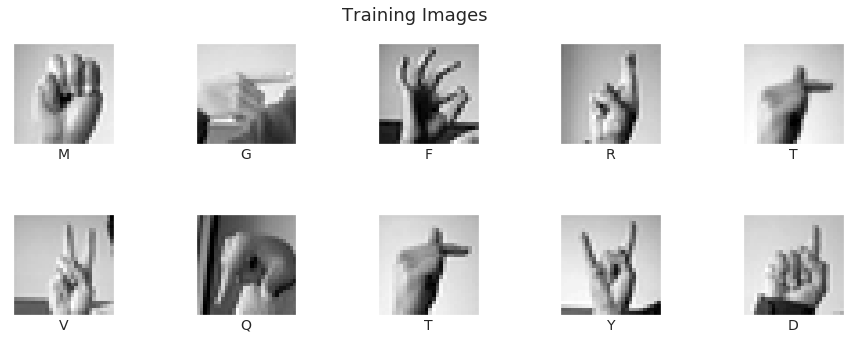

In [13]:
display_images(next_batch(10, train_x, train_y), 'Training Images')

## Tensorflow Graph Building

In [14]:
# hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 10000

In [15]:
# Network Hyperparameters
n_inputs = 784
nh1 = 256
nh2 = 256
nh3 = 256
nh4 = 256
nh5 = 256
n_outputs = 25

In [16]:
# placeholders
X = tf.placeholder('float', [None, n_inputs])
Y = tf.placeholder('float', [None, n_outputs])

In [17]:
# parameters
weights = { 'w1' : tf.Variable(tf.random_normal([n_inputs, nh1])),
            'w2' : tf.Variable(tf.random_normal([nh1, nh2])),
            'w3' : tf.Variable(tf.random_normal([nh2, nh3])),
            'w4' : tf.Variable(tf.random_normal([nh3, nh4])),
            'w5' : tf.Variable(tf.random_normal([nh4, nh5])),
            'out_w' : tf.Variable(tf.random_normal([nh5, n_outputs])) }

biases = {  'b1' : tf.Variable(tf.random_normal([nh1])),
            'b2' : tf.Variable(tf.random_normal([nh2])),
            'b3' : tf.Variable(tf.random_normal([nh3])),
            'b4' : tf.Variable(tf.random_normal([nh4])),
            'b5' : tf.Variable(tf.random_normal([nh5])),
            'out_b' : tf.Variable(tf.random_normal([n_outputs])) }

In [18]:
# model
def neural_network(x, weights, biases):
    
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer_out =  tf.matmul(layer5, weights['out_w']) + biases['out_b']
    
    return layer_out

In [19]:
# forward prop
logits = neural_network(X, weights, biases)

# calculate loss
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))

# backward prop
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_op)

# accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [20]:
init = tf.global_variables_initializer()

## Graph Execution

### Hold-Out Validation

In [21]:
# run the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    cost_hist, acc_hist = [], []
    
    for epoch in range(1, epochs + 1):
        batch_x, batch_y = next_batch(batch_size, train_x, train_y)
        
        sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
        
        if epoch % 500 == 0:
            c, acc = sess.run([loss_op, accuracy], feed_dict = { X : batch_x, Y : batch_y })
            cost_hist.append(c)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc))

    print('Accuracy on train data \t: ' + str(sess.run(accuracy, feed_dict = { X : train_x, Y :train_y}) * 100) + ' %')
    print('Accuracy on test data  \t: ' + str(sess.run(accuracy, feed_dict = { X : test_x, Y : test_y }) * 100) + ' %')

Epoch 500, Cost: 41743.473, Accuracy: 0.7109375
Epoch 1000, Cost: 7711.8726, Accuracy: 0.875
Epoch 1500, Cost: 777.28613, Accuracy: 0.984375
Epoch 2000, Cost: 2857.6885, Accuracy: 0.953125
Epoch 2500, Cost: 2967.5742, Accuracy: 0.9609375
Epoch 3000, Cost: 789.459, Accuracy: 0.9921875
Epoch 3500, Cost: 362.479, Accuracy: 0.9765625
Epoch 4000, Cost: 0.0, Accuracy: 1.0
Epoch 4500, Cost: 1300.3325, Accuracy: 0.9765625
Epoch 5000, Cost: 19.966797, Accuracy: 0.9921875
Epoch 5500, Cost: 223.96826, Accuracy: 0.984375
Epoch 6000, Cost: 643.27246, Accuracy: 0.9765625
Epoch 6500, Cost: 179.64941, Accuracy: 0.984375
Epoch 7000, Cost: 0.0, Accuracy: 1.0
Epoch 7500, Cost: 0.0, Accuracy: 1.0
Epoch 8000, Cost: 0.0, Accuracy: 1.0
Epoch 8500, Cost: 2047.7632, Accuracy: 0.984375
Epoch 9000, Cost: 251.85645, Accuracy: 0.984375
Epoch 9500, Cost: 0.0, Accuracy: 1.0
Epoch 10000, Cost: 0.0, Accuracy: 1.0
Accuracy on train data 	: 98.68435263633728 %
Accuracy on test data  	: 98.41077327728271 %


## Change in cost function


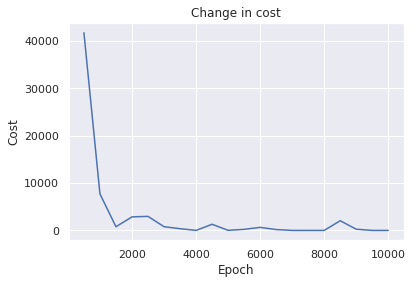

In [22]:
eps = list(range(500, epoch+500, 500))
plt.plot(eps, cost_hist)
plt.title("Change in cost")
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

## Change in accuracy


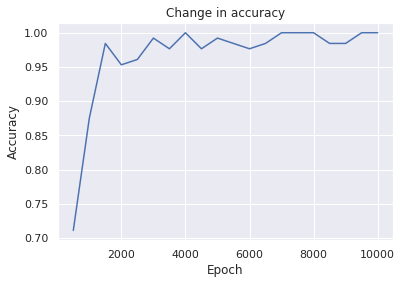

In [23]:
eps = list(range(500, epoch+500, 500))
plt.plot(eps, acc_hist)
plt.title("Change in accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

### K-Fold Cross Validation

In [24]:
# KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

current_fold = 1
train_acc_hist = []
test_acc_hist = []

for train_index, test_index in kf.split(train_y):
     
    KFold_X_train = train_x[list(train_index)]
    KFold_X_test = train_x[test_index]
    KFold_Y_train = train_y[train_index]
    KFold_Y_test = train_y[test_index]

    # run the graph
    with tf.Session() as sess:
    
        sess.run(init)

        for epoch in range(1, epochs + 1):

            batch_x, batch_y = next_batch(batch_size, KFold_X_train, KFold_Y_train)

            sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
    
        train_accuracy = sess.run(accuracy, feed_dict = { X : KFold_X_train, Y :KFold_Y_train }) * 100
        test_accuracy = sess.run(accuracy, feed_dict = { X : KFold_X_test, Y : KFold_Y_test }) * 100
        
        train_acc_hist.append(train_accuracy)
        test_acc_hist.append(test_accuracy)

        print('\nFOLD-' + str(current_fold) + '\n')
        print('Accuracy on train data \t:  {0:.2f} %'.format(train_accuracy))
        print('Accuracy on test data  \t:  {0:.2f} %'.format(test_accuracy))
        
        W = sess.run(weights)
        B = sess.run(biases)
        
    current_fold = current_fold +1
    
train_cross_val_score = np.mean(train_acc_hist)    
test_cross_val_score = np.mean(test_acc_hist)


print('\n\nFINAL TRAIN SET K-FOLD CROSS VALIDATION ACCURACY \t:  {0:.2f}'.format(train_cross_val_score))
print('\nFINAL TEST SET K-FOLD CROSS VALIDATION ACCURACY    \t:  {0:.2f}'.format(test_cross_val_score))



FOLD-1

Accuracy on train data 	:  97.19 %
Accuracy on test data  	:  96.90 %

FOLD-2

Accuracy on train data 	:  98.19 %
Accuracy on test data  	:  97.74 %

FOLD-3

Accuracy on train data 	:  98.98 %
Accuracy on test data  	:  98.80 %

FOLD-4

Accuracy on train data 	:  99.27 %
Accuracy on test data  	:  99.16 %

FOLD-5

Accuracy on train data 	:  99.21 %
Accuracy on test data  	:  98.86 %


FINAL TRAIN SET K-FOLD CROSS VALIDATION ACCURACY 	:  98.57

FINAL TEST SET K-FOLD CROSS VALIDATION ACCURACY    	:  98.29


## Save the parameters of the model

In [25]:
for key in W.keys():
    np.save(key, W[key])
for key in B.keys():
    np.save(key, B[key])

In [26]:
# set the parameters to the learned parameters
for key in weights.keys():
    weights[key] = tf.Variable(W[key])
for key in biases.keys():
    biases[key] = tf.Variable(B[key])

## Predict

In [27]:
logits = neural_network(X, weights, biases)

In [28]:
with tf.Session() as sess:
    
    for key in weights.keys():
        sess.run(weights[key].initializer)
    for key in biases.keys():
        sess.run(biases[key].initializer)
    
    output = sess.run(logits, feed_dict= {X : test_x}) 

## Visualization

Display the images and their labels as predicted by the Neural Net

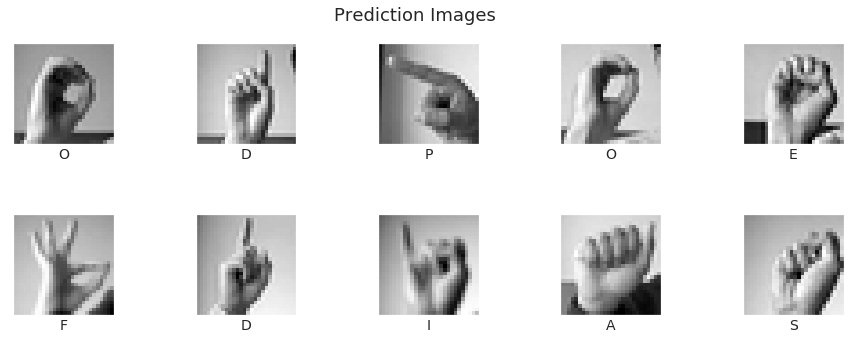

In [29]:
display_images(next_batch(10, test_x, output), 'Prediction Images')